In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [3]:
tf.__version__

'2.4.1'

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
labels = ['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

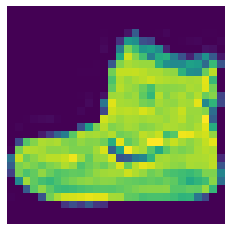

In [8]:
plt.imshow(X_train[0])
plt.axis("off")
plt.show()

In [9]:
labels[y_train[0]]

'Ankle boot'

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train.shape

(60000, 784)

In [14]:
model = keras.Sequential([
                          keras.layers.Dense(300, activation = 'relu', input_shape = (784, )),
                          keras.layers.Dense(100, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

In [15]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
model.fit(X_train, y_train,
          epochs = 10,
          batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6025 - accuracy: 0.7810
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3629 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3225 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3003 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2791 - accuracy: 0.8955
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2704 - accuracy: 0.8983
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2581 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2448 - accuracy: 0.9070
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2336 - accuracy: 0.9111
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.225

In [17]:
loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8769


In [18]:
test_accuracy

0.8769000172615051

In [19]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


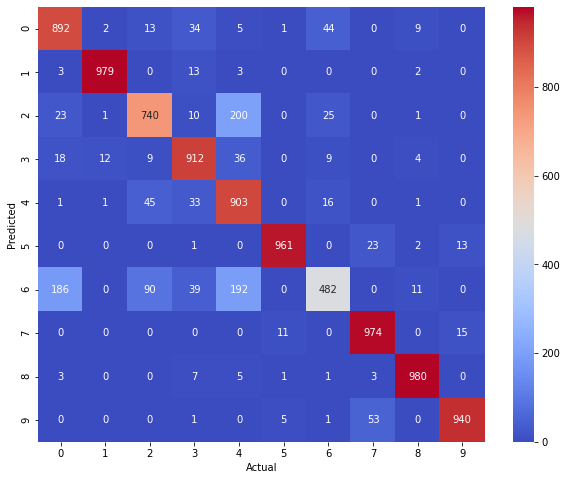

In [20]:
cm = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, cmap = 'coolwarm', annot = True, fmt = 'd')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()